In [1]:
from rfdetr import RFDETRBase

CHECKPOINT_PATH = "results/snail/checkpoint_best_ema.pth"
model_tuned = RFDETRBase(pretrain_weights=CHECKPOINT_PATH)

num_classes mismatch: pretrain weights has 0 classes, but your model has 90 classes
reinitializing detection head with 0 classes


Loading pretrain weights


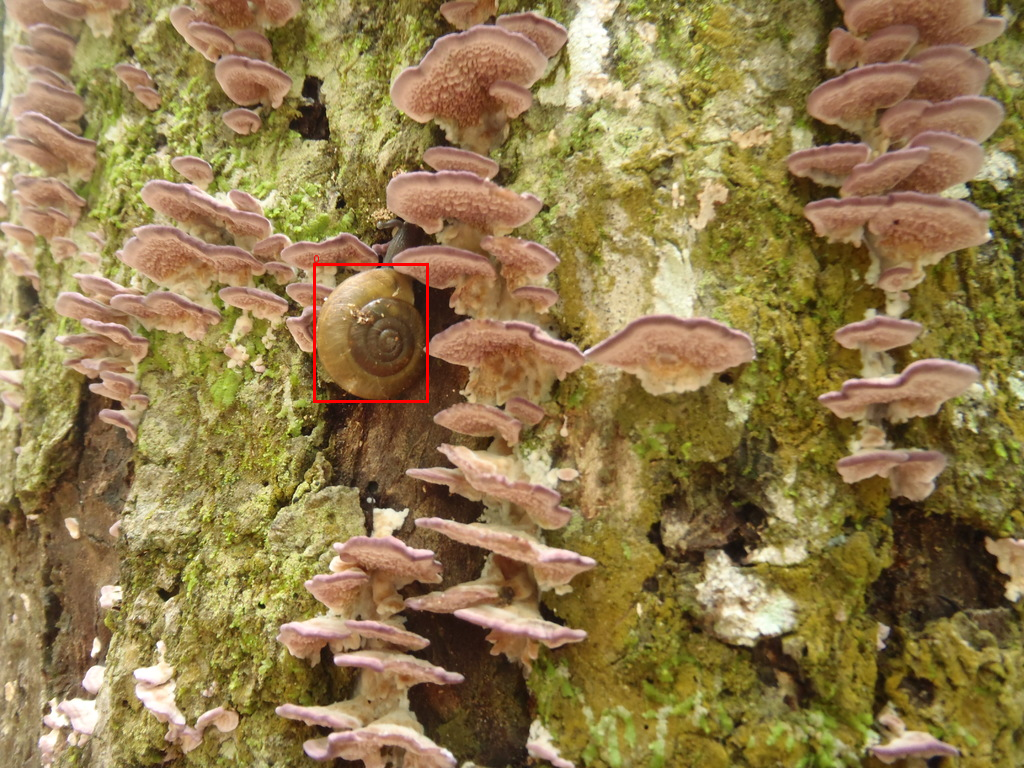

In [9]:
from PIL import Image, ImageDraw
import os
import random

# Path to the folder
folder_path = "dataset/test"

# List all .jpg files (case-insensitive)
jpg_files = [f for f in os.listdir(folder_path) if f.lower().endswith(".jpg")]

# Choose a random file
random_file = random.choice(jpg_files)

# Full path to the selected file
IMAGE_PATH = os.path.join(folder_path, random_file)

image_plot = Image.open(IMAGE_PATH).convert("RGB")

detections = model_tuned.predict(image_plot)

# Define bounding box in xyxy format: [x_min, y_min, x_max, y_max]
bboxes = detections.xyxy.tolist()

# Draw on image
draw = ImageDraw.Draw(image_plot)
for i, bbox in enumerate(bboxes):
    draw.rectangle(bbox, outline="red", width=3)
    draw.text((bbox[0], bbox[1] - 10), str(detections.class_id[i]), fill="red")

# Show image
image_plot